# Fateme Fouladi

# Q3: Breast Canser

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [24]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [30]:
# seprating X and y
X=cancer.data
y=cancer.target

# 1

First we normalize data with StandardScaler()

In [31]:
# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 2

Then we reduce the dimension to given numbers with PCA and apply a perceptron classifier for classification and then report the accuracies. we use 5-fold cross validation with 10 repeats.

In [42]:
# different numbers of components for PCA
components_list = [2, 3, 4, 5, 10, 15, 20]

# repeated 5-fold cross-validation with 10 repeats
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Lists to store train and test accuracies
train_accuracies = {n: [] for n in components_list}
test_accuracies = {n: [] for n in components_list}

for n_components in components_list:

    for train_index, test_index in rkf.split(X_normalized):
        X_train, X_test = X_normalized[train_index], X_normalized[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply PCA 
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train a perceptron classifier
        perceptron = Perceptron()
        perceptron.fit(X_train_pca, y_train)

        # Evaluate on the train and test sets
        y_train_pred = perceptron.predict(X_train_pca)
        y_test_pred = perceptron.predict(X_test_pca)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies[n_components].append(train_accuracy)
        test_accuracies[n_components].append(test_accuracy)
    
    # mean accuracy over all folds and repeats
    mean_accuracy_train = np.mean(train_accuracies[n_components])
    mean_accuracy_test = np.mean(test_accuracies[n_components])
    
    print(f'Number of Components: {n_components}, Mean Accuracy(train): {mean_accuracy_train:.4f},  Mean Accuracy(validation): {mean_accuracy_test:.4f}')

#-------------------------------------------------------
# Convert dictionaries to DataFrames
df_train_acc = pd.DataFrame(train_accuracies)
df_test_acc = pd.DataFrame(test_accuracies)

Number of Components: 2, Mean Accuracy(train): 0.9392,  Mean Accuracy(validation): 0.9338
Number of Components: 3, Mean Accuracy(train): 0.9442,  Mean Accuracy(validation): 0.9437
Number of Components: 4, Mean Accuracy(train): 0.9533,  Mean Accuracy(validation): 0.9522
Number of Components: 5, Mean Accuracy(train): 0.9673,  Mean Accuracy(validation): 0.9634
Number of Components: 10, Mean Accuracy(train): 0.9712,  Mean Accuracy(validation): 0.9661
Number of Components: 15, Mean Accuracy(train): 0.9738,  Mean Accuracy(validation): 0.9615
Number of Components: 20, Mean Accuracy(train): 0.9759,  Mean Accuracy(validation): 0.9612


And we plot the boxplots of accuracies

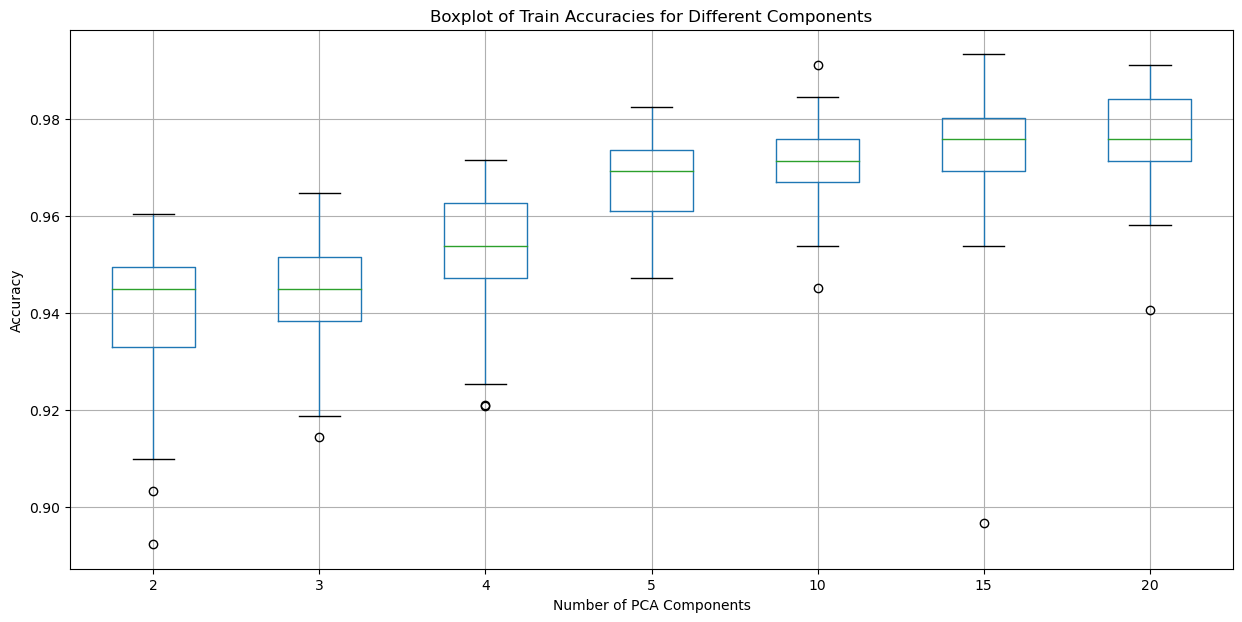

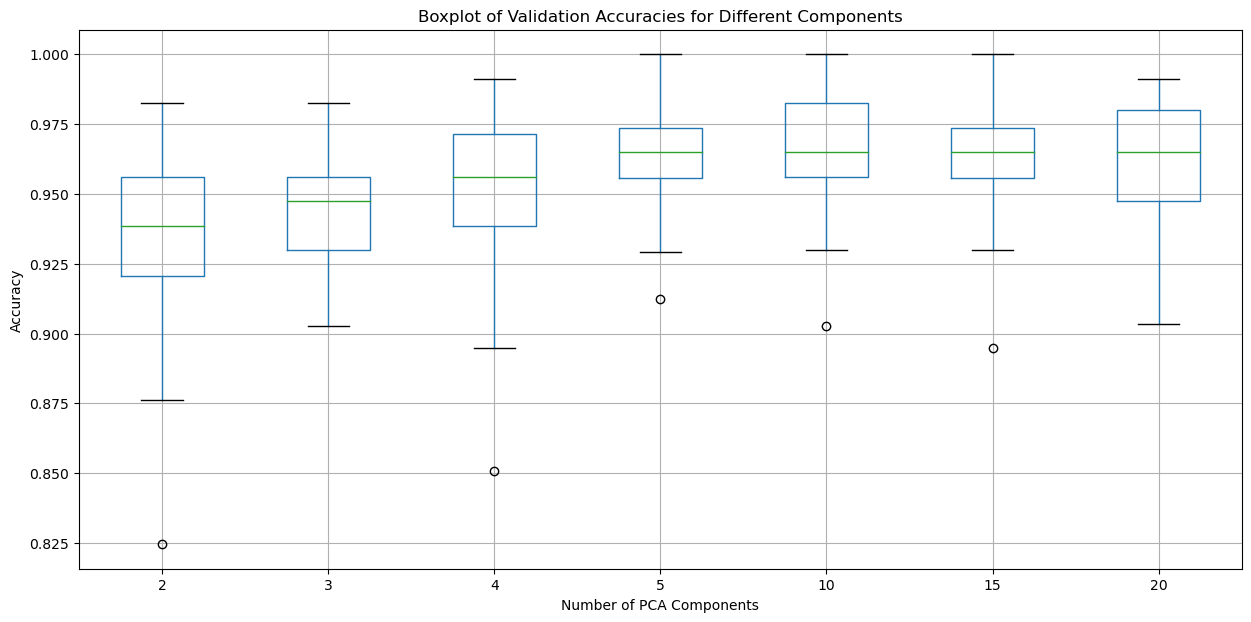

In [44]:
# train plots
plt.figure(figsize=(15, 7))
df_train_acc.boxplot()
plt.title('Boxplot of Train Accuracies for Different Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.show()

# validation plots
plt.figure(figsize=(15, 7))
df_test_acc.boxplot()
plt.title('Boxplot of Validation Accuracies for Different Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.show()

# 3

In [47]:
(cancer.feature_names).shape

(30,)

Based on the plots accuracies for 10, 15, 20 number of components are good and they are closely aligned also the models didn't overfit. But we want a simple model and good accuracy so we choose the model with 10 or 15 components.